In [89]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
# from plotnine.data import mtcars
import matplotlib.pyplot as plt
import seaborn as sns
mtcars = pd.read_csv("https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv")


%matplotlib inline

# INTRO to GG

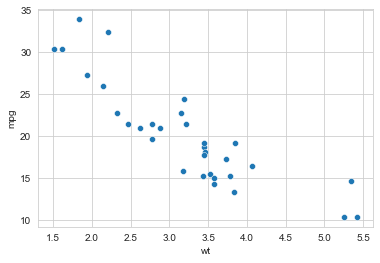

In [90]:
# (ggplot(mtcars, aes(x = "wt", y = "mpg")) + geom_point())
sns.scatterplot(x = "wt", y = "mpg", data = mtcars)

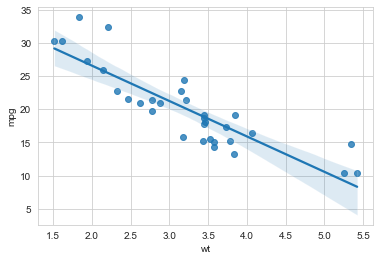

In [91]:
# (ggplot(mtcars, aes(x = "wt", y = "mpg")) + geom_point() +
# stat_smooth(method = "lm"))

sns.regplot(x = "wt", y = "mpg", data = mtcars)

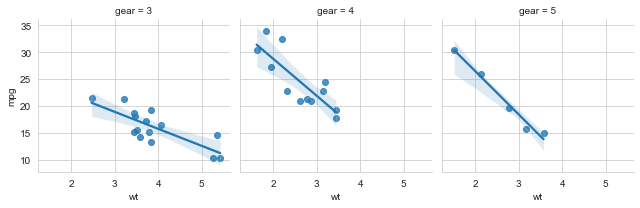

In [92]:
# (ggplot(mtcars, aes(x = "wt", y = "mpg")) + geom_point() +
# stat_smooth(method = "lm") + 
# facet_wrap("~gear"))

facet = sns.FacetGrid(col = "gear", data = mtcars)
facet.map(sns.regplot, "wt", "mpg")

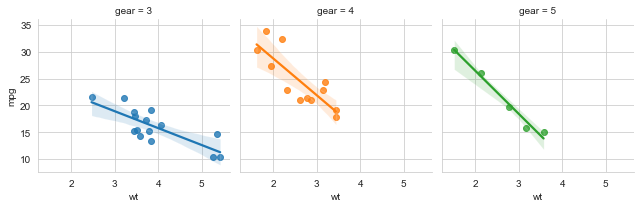

In [93]:
# (ggplot(mtcars, aes(x = "wt", y = "mpg", color = "factor(gear)")) + geom_point() +
# stat_smooth(method = "lm") + 
# facet_wrap("~gear"))

facet = sns.FacetGrid(col = "gear", data = mtcars, hue = "gear")
facet.map(sns.regplot, "wt", "mpg")

In [94]:
penguin = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/penguins.csv")
penguin.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


# SNS Basic Steps
## 1. Tell SNS what kind of plot you want (using `sns.*`)
## 2. Tell SNS what you want to plot (inside the `sns.*()` function)

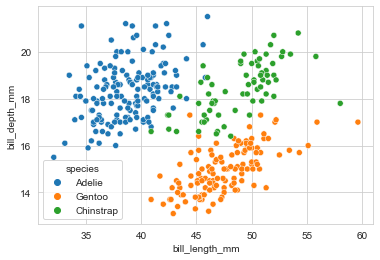

In [95]:
# (ggplot(penguin, aes(x = "bill_length_mm", y = "bill_depth_mm", color = "species")))

#sns.scatterplot()
sns.scatterplot(x = "bill_length_mm", y = "bill_depth_mm", hue = "species", data = penguin)

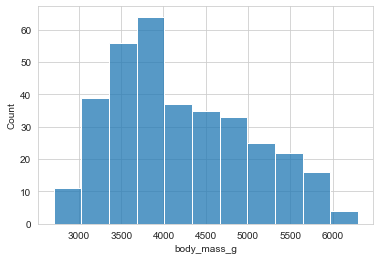

In [96]:
# (ggplot(penguin, aes(x = "body_mass_g")) + geom_histogram())

sns.histplot(x = "body_mass_g", data = penguin)
# sns.

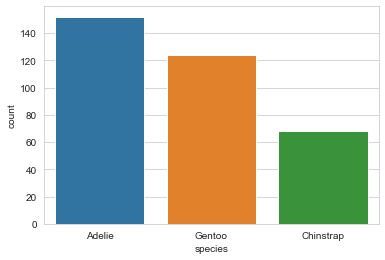

In [97]:
# (ggplot(penguin, aes(x = "species")) + geom_bar())

sns.countplot(x = "species", data = penguin)

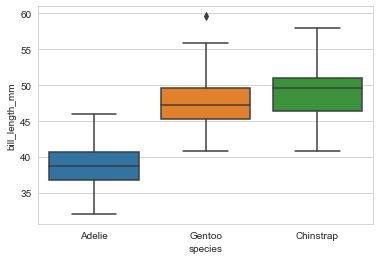

In [98]:
# (ggplot(penguin, aes(x = "species", y = "bill_length_mm")) + geom_boxplot())
sns.boxplot(x ="species", y = "bill_length_mm", data = penguin)

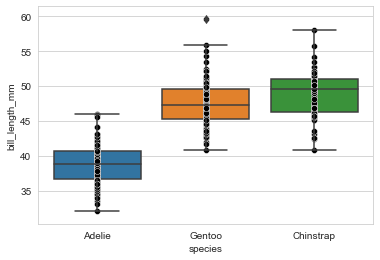

In [99]:
# (ggplot(penguin, aes(x = "species", y = "bill_length_mm", fill = "species")) +
#  geom_point() + 
#  geom_boxplot() + theme_minimal())
sns.boxplot(x ="species", y = "bill_length_mm", data = penguin)
sns.scatterplot(x = "species", y = "bill_length_mm", data = penguin, color = "black")

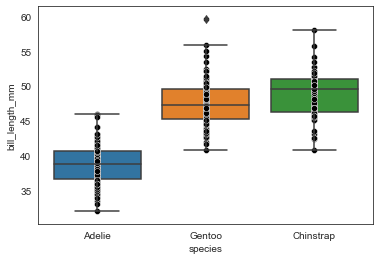

In [112]:
# (ggplot(penguin, aes(x = "species", y = "bill_length_mm")) +
#  geom_point() + 
#  geom_boxplot(aes(fill = "species")) + theme_minimal())

sns.set_style("white")
sns.boxplot(x ="species", y = "bill_length_mm", data = penguin)
sns.scatterplot(x = "species", y = "bill_length_mm", data = penguin, color = "black")


# Prepping Data for Barcharts


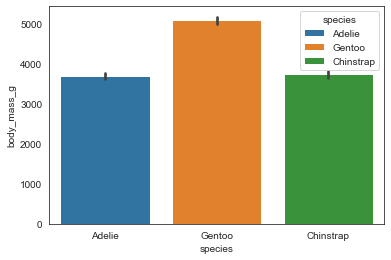

In [113]:
# (ggplot(penguin, aes(x = "species", y = "body_mass_g", fill = "species")) + 
# stat_summary(fun_data = "mean_sdl", geom = "bar"))

sns.barplot(x = "species", y = "body_mass_g", hue = "species", data = penguin, dodge = False)

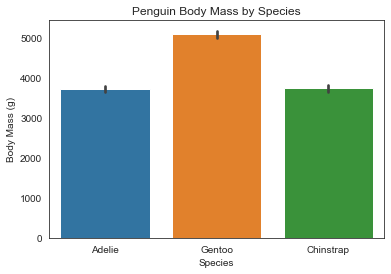

In [114]:
# (ggplot(penguin, aes(x = "species", y = "body_mass_g", fill = "species")) + 
# stat_summary(fun_data = "mean_sdl", geom = "bar") + 
#  labs(x = "Species", y = "Body Mass (g)") + 
#  ggtitle("Penguin Body Mass by Species") +
#  theme_minimal() +
#  theme(panel_grid_major_x = element_blank(),
#      panel_grid_minor_x = element_blank(),
#       panel_grid_minor_y = element_blank(),
#       legend_position = "none"))

bp = sns.barplot(x = "species", y = "body_mass_g", hue = "species", data = penguin, dodge = False)
bp.set(title = "Penguin Body Mass by Species",
xlabel = "Species", ylabel = "Body Mass (g)")
bp.grid(False)
plt.legend([],[], frameon = False)

In [115]:
penguin_bill = penguin.groupby(["species"], as_index = False)["bill_length_mm"].mean()
penguin_bill

,species,bill_length_mm
0,Adelie,38.791391
1,Chinstrap,48.833824
2,Gentoo,47.504878


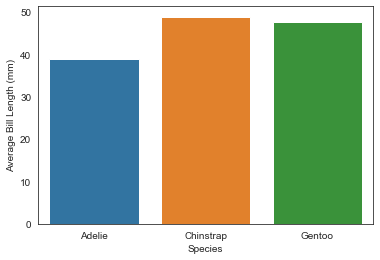

In [116]:
# (ggplot(penguin_bill, aes(x = "species", y = "bill_length_mm", fill = "species")) + 
# geom_bar(stat = "identity") + theme_minimal() + 
# labs(x = "Species", y = "Average Bill Length (mm)"))

bp2 = sns.barplot(x = "species", y = "bill_length_mm", hue = "species", data = penguin_bill, dodge = False)
bp2.set(xlabel = "Species", ylabel = "Average Bill Length (mm)")
plt.legend([],[], frameon = False)

# NON Count Bar Charts

In [117]:
books = ["Home Before Dark", "The Wives", "You", "The Last Mrs. Parrish", "The Guest List", "Invisible Girl"]
ratings = [4.08,3.63,3.93,3.93, 3.85, 3.81]
book_df = pd.DataFrame({"books":books, "ratings": ratings})
book_df

,books,ratings
0,Home Before Dark,4.08
1,The Wives,3.63
2,You,3.93
3,The Last Mrs. Parrish,3.93
4,The Guest List,3.85
5,Invisible Girl,3.81


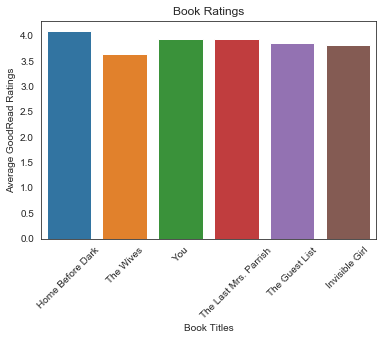

In [118]:
# (ggplot(book_df, aes(x = "books", y = "ratings")) + 
# geom_bar(aes(fill = "books"), stat = "identity") +
# theme_minimal() +
# labs(title = "Book Ratings",
#     x = "Book Titles",
#     y = "Average GoodRead Ratings") +
# theme(axis_text_x = element_text(angle = 45),
#      legend_position = "none"))

bp3 = sns.barplot(data = book_df, x = "books", y = "ratings", hue = "books", dodge = False)
bp3.set(title = "Book Ratings",
xlabel = "Book Titles", ylabel = "Average GoodRead Ratings")
plt.xticks(rotation=45)
plt.legend([],[], frameon = False)

# Let's Try to explore a new data set using Visualization!

In [119]:
cereal = pd.read_csv("https://raw.githubusercontent.com/reisanar/datasets/master/Cereals.csv")
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


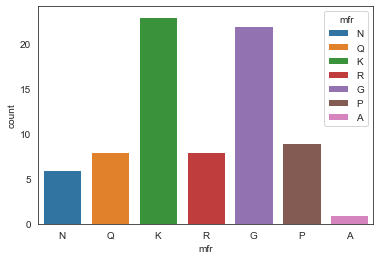

In [120]:
# (ggplot(cereal, aes(x = "mfr", fill = "mfr")) + geom_bar() + theme_bw())

sns.countplot(data = cereal, x = "mfr", hue = "mfr", dodge = False)

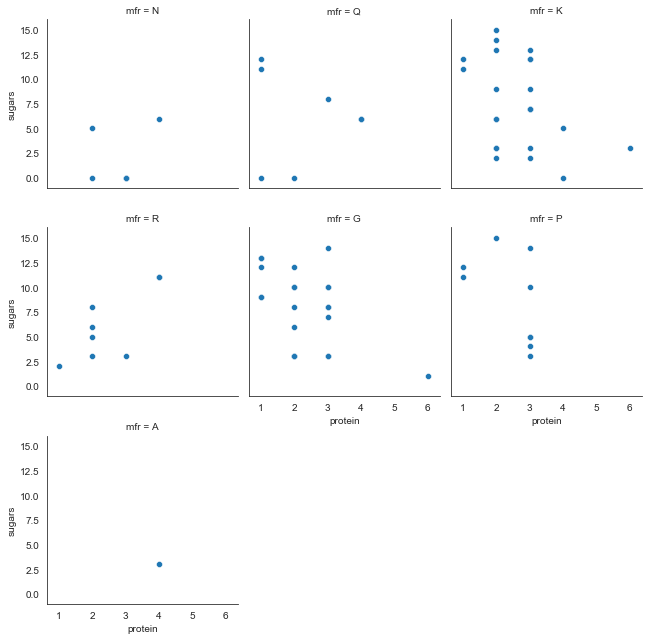

In [121]:
#facet wrap/grid
# (ggplot(cereal, aes(x = "protein", y = "sugars")) + geom_point() + theme_bw() +
# facet_wrap("~mfr"))

f = sns.FacetGrid(data = cereal, col = "mfr", col_wrap= 3)
f.map(sns.scatterplot, "protein", "sugars")

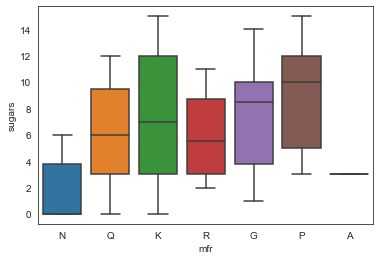

In [122]:
# (ggplot(cereal, aes(x = "mfr", y = "sugars")) + geom_boxplot() + theme_minimal())

sns.boxplot(data = cereal, x = "mfr", y = "sugars")